In [1]:
%load_ext tikzmagic
%matplotlib inline

# 스케일링과 다중공선성

지금까지 선형회귀분석을 할 때 항상 독립변수값의 평균을 0, 분산을 1로 만드는 스케일링(scaling)을 하도록 권장하였다. 이 절에서는 스케일링이 회귀분석에 어떤 영향을 미치고 왜 필요한 것인지를 설명한다. 또한 독립변수간의 상관관계의 영향도 같이 공부한다.

## 스케일링

독립변수의 값은 사용하는 단위에 따라 아주 작은 값이 될 수도 있고 아주 큰 값이 될 수도 있다. 이러한 단위를 재설정하여 독립변수의 평균을 0, 분산을 1로 만드는 작업을 스케일링이라고 한다고 설명하였다. 실제로 보스턴 집값 데이터를 사용하여 스케일링의 영향을 살펴보자.

예제로 보스턴 집값 medv 를 두개의 독립변수 tax, nox 로 선형회귀분석을 해본다.

In [2]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset("Boston", "MASS").data

우선 스케일링을 한 회귀분석 결과는 다음과 같다.

In [3]:
formula_scaled = "medv ~ scale(tax) + scale(nox)"
result_scaled = sm.OLS.from_formula(formula_scaled, boston).fit()
print(result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     80.79
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           3.75e-31
Time:                        09:50:26   Log-Likelihood:                -1769.8
No. Observations:                 506   AIC:                             3546.
Df Residuals:                     503   BIC:                             3558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.356     63.222      0.0

이번에는 스케일링을 하지 않는 결과를 살펴보자.

In [4]:
formula_notscaled = "medv ~ tax + nox"
result_notscaled = sm.OLS.from_formula(formula_notscaled, boston).fit()
print(result_notscaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     80.79
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           3.75e-31
Time:                        09:50:26   Log-Likelihood:                -1769.8
No. Observations:                 506   AIC:                             3546.
Df Residuals:                     503   BIC:                             3558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9878      1.784     21.857      0.0

두 회귀분석 결과 요약을 비교하면 결정계수를 포함한 모든 성능 값이나 가중치의 유의확률등이 동일한 것을 알 수 있다. 물론 독립변수의 값이 다르므로 가중치 자체의 값은 달라지지만 스케일링 시에 독립변수 값이 커진(혹은 작아진)만큼 가중치가 작아(커)지므로 실질적으로는 차이가 없다. 실제로 두가지 결과 객체로 예측을 해보아도 예측값은 같아진다. 

실질적인 차이가 있는 부분은 우측 하단에 표시된 `Cond. No.` 라는 값과 새롭게 나타난 두번째 주의사항이다. 


<span class="caption">[스케일을 한 경우의 결과]</span>
```
                            OLS Regression Results                            
==============================================================================




                                        Cond. No.                         2.24
==============================================================================
```


<span class="caption">[스케일을 하지 않은 경우의 결과]</span>
```
                            OLS Regression Results                            
==============================================================================




                                        Cond. No.                     5.48e+03
==============================================================================
Notes:

[2] The condition number is large, 5.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
```

`Cond. No.` 라는 값은 <b>조건수(condition number)</b>라는 값이다. 조건수는 가중치를 구할 때 사용하는 다음 수식

$$
\hat{w} = (X^TX)^{-1}X^T y
$$

에서 $X^TX$ 행렬의 가장 작은 고유값(eigen-value) $\lambda_{\text{min}}$와 가장 큰 고유값 $\lambda_{\text{max}}$의 비율을 나타낸다.

$$
\text{조건수(condition number)} = \dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}}
$$

스케일링을 하지 않은 경우에 나타난 주의사항을 해석하면 다음과 같다.

```
[2] 조건수가 5,480으로 크다. 이는 강한 다중공선성이 있거나 수치적인 문제가 있다는 것을 의미할 수 있다. 
```


선형회귀분석에서 조건수는 선형회귀분석 결과의 <b>수치적 안정성(numerical stability)</b>을 나타내는 값이다. 수치적 안정성이라는 것은 우리가 선형회귀분석에 사용한 독립변수값에 오류가 있었을 경우 이 오류에 얼마나 민감하게 반응하는가를 나타낸다.

우리가 분석에 사용하는 독립변수의 값은 측정에 의한 것이므로 반올림 오차 등을 포함한 노이즈(noise) 오차를 항상 어느정도 가지게 된다. 조건수가 크면 수치적 안정성이 떨어져 오차에 대해 더 민감하게 반응한다.

예시를 위해 우리가 가진 보스턴 집값 데이터에 일부러 어느정도 노이즈 오차를 추가해 보았다.

In [5]:
from numpy.random import seed, rand

boston_nox_tax = boston[["nox", "tax", "medv"]]
boston_noise = boston_nox_tax.copy()
seed(0)
boston_noise["tax"] += boston_noise["tax"] * np.random.rand(len(boston_nox_tax)) * 0.01
boston_noise["nox"] += boston_noise["nox"] * np.random.rand(len(boston_nox_tax)) * 0.01

pd.concat([boston_nox_tax, boston_noise], axis=1, keys=["원본", "노이즈 오차 추가"])

원본            노이즈 오차 추가                  
       nox  tax  medv       nox         tax  medv
0    0.538  296  24.0  0.542639  297.624488  24.0
1    0.469  242  21.6  0.469228  243.730758  21.6
2    0.469  242  34.7  0.470190  243.458687  34.7
3    0.458  222  33.4  0.460043  223.209641  33.4
4    0.458  222  36.2  0.458479  222.940514  36.2
..     ...  ...   ...       ...         ...   ...
501  0.573  273  22.4  0.573176  274.018385  22.4
502  0.573  273  20.6  0.574286  274.433169  20.6
503  0.573  273  23.9  0.578465  275.049124  23.9
504  0.573  273  22.0  0.576337  273.910475  22.0
505  0.573  273  11.9  0.573616  275.522953  11.9

[506 rows x 6 columns]

이렇게 오차를 추가한 값으로 다시 선형회귀분석을 하여 가중치가 얼마나 달라지는지 살펴보자.

In [6]:
result_scaled_noise = sm.OLS.from_formula(formula_scaled, boston_noise).fit()
result_notscaled_noise = sm.OLS.from_formula(formula_notscaled, boston_noise).fit()

스케일링을 한 경우에는 tax, nox의 가중치가 각각 5%, -6% 정도 변화하였다.

In [7]:
error_scaled = (result_scaled.params - result_scaled_noise.params) / result_scaled.params * 100
pd.concat([result_scaled.params, result_scaled_noise.params, error_scaled], 
          axis=1, keys=["원본 데이터를 사용한 경우", "노이즈 오차가 있는 경우", "가중치 오류(%)"])

,원본 데이터를 사용한 경우,노이즈 오차가 있는 경우,가중치 오류(%)
Intercept,22.532806,22.532806,0.000000
scale(tax),-3.037683,-3.036102,0.052051
scale(nox),-1.896985,-1.898227,-0.065452


하지만 스케일링을 하지 않은 경우에는 tax, nox의 가중치가 각각 59%, 45% 정도 변화하였다.

In [8]:
error_notscaled = (result_notscaled.params - result_notscaled_noise.params) / result_notscaled.params * 100
pd.concat([result_notscaled.params, result_notscaled_noise.params, error_notscaled], 
          axis=1, keys=["원본 데이터를 사용한 경우", "노이즈 오차가 있는 경우", "가중치 오류(%)"])

,원본 데이터를 사용한 경우,노이즈 오차가 있는 경우,가중치 오류(%)
Intercept,38.987751,38.984622,0.008025
tax,-0.018042,-0.017935,0.590006
nox,-16.386784,-16.312490,0.453375


따라서 일반적인 경우에는 모든 독립변수에 대해 스케일링을 하는 것이 안전하고 권장된다.

## 다중공선성

다음으로 스케일링을 하지 않았을 때 나타난 주의사항에서 언급된 "다중공선성"이란 용어에 대해 설명한다. <b>다중공선성(multi-collinearity)</b>은 독립변수 사이에 강한 상관관계가 있음을 의미한다. 다중공선성이 있으면 회귀분석에 다음과 같은 나쁜 영향을 미친다.

* 스케일링을 하지 않았을 때처럼 가중치 계산의 수치적 안정성을 악화시킨다.
* 과최적화가 발생했을 때처럼 검증성능을 악화시킨다.

첫번째 단점은 앞에서 예시를 보였으므로 여기에서는 두번째 단점을 보인다. 과최적화가 발생하는 것을 보이기 위해 보스턴 집값 전체 데이터 중 앞부분 250개를 학습 데이터로, 뒷부분 250개를 검증 데이터로 사용한다.

In [9]:
boston_train = boston.iloc[:250]
boston_test = boston.iloc[250:500]

다음과 같은 9개의 독립변수를 사용하여 종속변수 medv를 예측하는 선형회귀분석을 실시한다.

In [10]:
x_names1 = ["lstat", "rm", "ptratio", "dis", "tax", "black", "zn", "crim", "nox"]   
formula1 = "medv ~ " + " + ".join([f"scale({x})" for x in x_names1])
result1 = sm.OLS.from_formula(formula1, boston_train).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.20e-91
Time:                        09:50:26   Log-Likelihood:                -653.31
No. Observations:                 250   AIC:                             1327.
Df Residuals:                     240   BIC:                             1362.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.2840      0.213    113.

과최적화가 발생하는지 확인하기 위해 학습데이터와 검증데이터를 사용하는 경우의 잔차제곱합을 각각 계산한다. 검증데이터를 사용하면 잔차제곱합이 20배 이상 증가하는 것을 알 수 있다.

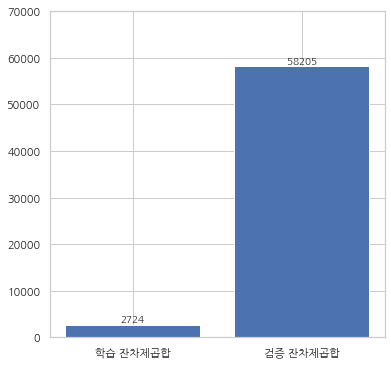

In [11]:
y_train = boston_train.medv
y_test = boston_test.medv

y_train_pred1 = result1.get_prediction(boston_train).predicted_mean
y_test_pred1 = result1.get_prediction(boston_test).predicted_mean

rss_train1 = ((y_train - y_train_pred1) ** 2).sum()
rss_test1 = ((y_test - y_test_pred1) ** 2).sum()

plt.figure(figsize=(6, 6))
bar = plt.bar(
    ["학습 잔차제곱합", "검증 잔차제곱합"], 
    [rss_train1, rss_test1],
)
plt.bar_label(bar, [int(rss_train1), int(rss_test1)])
plt.ylim(0, 70000)
plt.show()

이러한 과최적화 현상이 발생하는 이유는 독립변수 사이의 강한 상관관계로 인한 다중공선성 때문이다. 실제로 일부 독립변수들의 상관계수의 절대값을 구하면 다음과 같다.

In [12]:
corr_abs = boston[["dis", "nox", "tax", "lstat"]].corr().abs()
corr_abs.style.background_gradient()

,dis,nox,tax,lstat
dis,1.000000,0.769230,0.534432,0.496996
nox,0.769230,1.000000,0.668023,0.590879
tax,0.534432,0.668023,1.000000,0.543993
lstat,0.496996,0.590879,0.543993,1.000000


독립변수 사이의 상관관계로 인한 다중공선성 문제를 해결하는 방법으로는 다음 두가지 방법이 있다.

* 여러개의 독립변수를 제거하고 이들을 선형조합한 새로운 독립변수 하나를 추가한다.
* 상관관계가 큰 독립변수들을 모형에서 제거한다.

첫번째 방법을 사용하려면 주성분분석(PCA: principal component analysis) 방법으로 알아야 하므로 여기에서는 일단 생략하고 추후 주성분분석을 공부한 뒤에 다시 설명한다.

두번째 방법을 사용하기 위해서는 어떤 독립변수가 가장 다른 독립변수들과 상관관계가 큰지를 계산해야 한다. 보통은 각각의 독립변수 $x_k$에 대한 VIF(variance inflation factor)라는 값을 구해서 사용한다. $\text{VIF}_k$는 어떤 독립변수 $x_k$를 다른 독립변수 $x_1, x_2, \ldots, x_{k-1}, x_{k+1}, \ldots, x_K$로 선형회귀분석을 했을 때의 성능을 나타내는 지표다. 다음과 같이 정의한다.

$$
\text{VIF}_k = \dfrac{1}{1-R_k^2}
$$

이 식에서 $R_k$는 독립변수 $x_k$를 다른 독립변수 $x_1, x_2, \ldots, x_{k-1}, x_{k+1}, \ldots, x_K$로 선형회귀분석을 했을 때의 결정계수값이다. VIF가 높다는 것은 다른 독립변수를 선형조합하여 해당 독립변수를 잘 추정할 수 있다는 뜻이므로 해당 독립변수가 다른 독립변수와 상관관계가 높다는 것을 의미한다.

statsmodels 패키지는 VIF를 계산하는 `variance_inflation_factor` 함수를 제공한다. 이 함수를 사용하여 위 모형의 각 독립변수 VIF를 계산하면 다음과 같다.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = result1.model.exog
X_names = result1.model.exog_names

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = X_names
vif.sort_values("VIF", ascending=False)

,VIF,features
9,5.105774,scale(nox)
8,3.202152,scale(crim)
4,3.091003,scale(dis)
1,2.507665,scale(lstat)
2,2.219342,scale(rm)
7,2.190215,scale(zn)
3,1.587904,scale(ptratio)
5,1.423732,scale(tax)
6,1.393677,scale(black)
0,1.000000,Intercept


일반적으로 VIF값이 5를 넘으면 큰 것으로 간주하여 생략한다. 위 결과로 보아 nox 독립변수가 다른 독립변수와 상관관계가 강하므로 이를 제거하여 새로운 선형회귀분석을 한다.

In [14]:
x_names2 = ["lstat", "rm", "ptratio", "dis", "tax", "black", "zn", "crim"]   
formula2 = "medv ~ " + " + ".join([f"scale({x})" for x in x_names2])
result2 = sm.OLS.from_formula(formula2, boston_train).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.50e-91
Time:                        09:50:26   Log-Likelihood:                -656.77
No. Observations:                 250   AIC:                             1332.
Df Residuals:                     241   BIC:                             1363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.2840      0.216    112.

결정계수는 0.844에서 0.840으로 미세하게 줄어들었다. 하지만 검증데이터에 대한 잔차제곱합을 구하면 nox를 포함하는 모형보다 훨씩 작아진 것을 볼 수 있다.

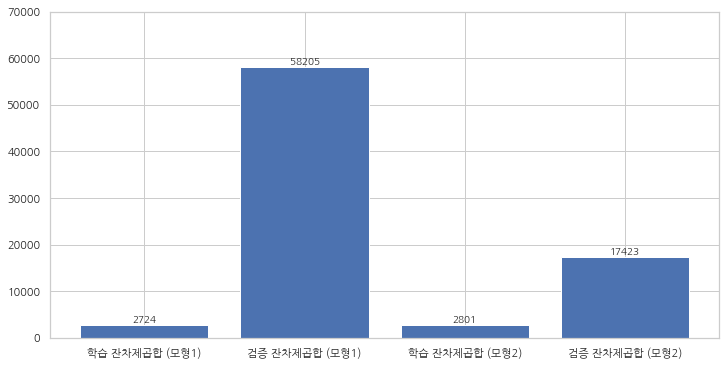

In [15]:
y_train_pred2 = result2.get_prediction(boston_train).predicted_mean
y_test_pred2 = result2.get_prediction(boston_test).predicted_mean

rss_train2 = ((y_train - y_train_pred2) ** 2).sum()
rss_test2 = ((y_test - y_test_pred2) ** 2).sum()

plt.figure(figsize=(12, 6))
bar = plt.bar(
    ["학습 잔차제곱합 (모형1)", "검증 잔차제곱합 (모형1)", 
     "학습 잔차제곱합 (모형2)", "검증 잔차제곱합 (모형2)"], 
    [rss_train1, rss_test1, rss_train2, rss_test2]
)
plt.bar_label(bar, [int(rss_train1), int(rss_test1),
                    int(rss_train2), int(rss_test2)])
plt.ylim(0, 70000)
plt.show()

## 선형종속

다중공선성의 가장 극단적인 경우는 독립변수간에 선형종속 관계가 있는 경우다. <b>선형종속(linearly-dependent)</b>이란 하나 이상의 독립변수를 선형조합(linear-combination)하면 다른 독립변수와 같아지는 것을 의미한다. 수식으로 나타내면 다음과 같다.

$$
c_1 x_1 + c_2 x_2 + c_3 x_3 + \cdots + c_J x_J = 0
$$

이 수식에서 $c_j$는 스칼라 상수고 $x_j$는 독립변수 벡터다.

다음은 실무에서 발생하기 쉬운 선형조합의 특수한 경우다.

1) 두 독립변수 벡터가 단위만 다르고 실질적으로 같은 경우. 예를 들어 독립변수 데이터 집합 안에 같은 열이 있거나 같은 값인데 단위만 다른 데이터 열이 같이 있는 경우

$$
x_1 - c x_2 = 0 \;\; \leftrightarrow \;\; x_1 = c x_2
$$

2) 몇개의 독립변수를 합하거나 평균하면 다른 독립변수가 되는 경우. 예를 들어 독립변수 데이터 집합 안에 각 과목의 점수와 모든 과목의 총점이 같이 있는 경우  

$$
x_1 + x_2 + x_3 - x_4 = 0 \;\; \leftrightarrow \;\; x_4 = x_1 + x_2 + x_3
$$

이 경우에는 $X^TX$ 행렬의 역행렬이 존재하지 않으므로 수학적으로는 선형회귀분석의 가중치가 존재하지 않는다.